In [1]:
from __future__ import print_function, division
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm

In [2]:
plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

def read_SSMIS_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    TB1 = nc_fid.variables["fcdr_tb91h_img2"][:]  # shape lat, lon as shown above
    TB2 = nc_fid.variables["fcdr_tb91v_img2"][:]  # shape lat, lon as shown above
    TB3 = nc_fid.variables["tb150h_img1"][:]  # shape lat, lon as shown above
    lats = nc_fid.variables['lat_img2'][:]  # extract/copy the data
    lons = nc_fid.variables['lon_img2'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return TB1, TB2, TB3, lats, lons, names

def read_radar_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z, lat, lon, names

def make_radar_mask(Z,lat,lon):
    Z[Z>70]=69
    print('Z shape', Z.shape, Z)
    Z_30 = ma.masked_where(Z < 30, Z)
    print('Z_30 shape', Z_30.shape)
    Z_40 = ma.masked_where(Z < 40, Z)
    print('Z_40 shape', Z_40.shape)
    lonz,latz = np.meshgrid(lon,lat)
    print('lats shape, lons shape', latz.shape, lonz.shape, latz,lonz)
    return Z_30, Z_40, lonz, latz

Z_file_DTX = 'KDTX_V03_20120629_223054.nc'
Z_DTX, lat_dtx, lon_dtx, names = read_radar_plot(Z_file_DTX)
Z_DTX = Z_DTX[0,0,:,:]
Z_DTX = np.nan_to_num(Z_DTX)
print(names)
print('Z_DTX shape', Z_DTX.shape, Z_DTX)
Z_DTX_max = np.amax(Z_DTX)
Z_DTX_min = np.amin(Z_DTX)
print('Z_DTX min, Z_DTX max', Z_DTX_min, Z_DTX_max)
print('lat shape, lon shape', lat_dtx.shape, lon_dtx.shape)

Z_30_DTX, Z_40_DTX, lonz_dtx, latz_dtx = make_radar_mask(Z_DTX, lat_dtx, lon_dtx) 

Z_file_CLE = 'KCLE_V06_20120629_223200.nc'
Z_CLE, lat_cle, lon_cle, names = read_radar_plot(Z_file_CLE)
Z_CLE = Z_CLE[0,:,:]
Z_CLE = np.nan_to_num(Z_CLE)
print(names)
print('Z_CLE shape', Z_CLE.shape, Z_CLE)
Z_CLE_max = np.amax(Z_CLE)
Z_CLE_min = np.amin(Z_CLE)
print('Z_CLE min, Z_CLE max', Z_CLE_min, Z_CLE_max)
print('lat shape, lon shape', lat_cle.shape, lon_cle.shape)

Z_30_CLE, Z_40_CLE, lonz_cle, latz_cle = make_radar_mask(Z_CLE, lat_cle, lon_cle) 

Z_file_PBZ = 'KPBZ_V06_20120629_222944.nc'
Z_PBZ, lat_pbz, lon_pbz, names = read_radar_plot(Z_file_PBZ)
Z_PBZ = Z_PBZ[0,:,:]
Z_PBZ = np.nan_to_num(Z_PBZ)
print(names)
print('Z_PBZ shape', Z_PBZ.shape, Z_PBZ)
Z_PBZ_max = np.amax(Z_PBZ)
Z_PBZ_min = np.amin(Z_PBZ)
print('Z_PBZ min, Z_PBZ max', Z_PBZ_min, Z_PBZ_max)
print('lat shape, lon shape', lat_pbz.shape, lon_pbz.shape)

Z_30_PBZ, Z_40_PBZ, lonz_pbz, latz_pbz = make_radar_mask(Z_PBZ, lat_pbz, lon_pbz) 

SSMIS_file = 'CSU_SSMIS_FCDR_V01R00_F17_D20120629_S2155_E2337_R29162.nc'
TB1, TB2, TB3, lats, lons, names = read_SSMIS_plot(SSMIS_file)
TB1 = TB1[250:400,:]
lats = lats[250:400,:]
lons = lons[250:400,:]
lats_mn = np.mean(lats)
lons_mn = np.mean(lons)
print("Lats mean= ", lats_mn)
print("Lons mean= ", lons_mn)
TB1_max = np.amax(TB1) 
TB1_min = np.amin(TB1)
print("TB1 max =", TB1_max)
print("TB1 min =", TB1_min)
print("TB1 = ", TB1, TB1.shape)
TB2 = TB2[250:400,:]
TB2_max = np.amax(TB2)
TB2_min = np.amin(TB2)
print("TB2 max =", TB2_max)
print("TB2 min =", TB2_min)
print("TB2 = ", TB2, TB2.shape)
TB3 = TB3[250:400,:]
TB3_max = np.amax(TB3)
TB3_min = np.amin(TB3)
print("TB3 max =", TB3_max)
print("TB3 min =", TB3_min)
print("TB3 = ", TB3, TB3.shape)
print("Lats = ", lats, lats.shape)
print("Lons = ", lons, lons.shape)
                            



/tmp/ipykernel_1338/2314651533.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
/tmp/ipykernel_1338/2314651533.py:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_fid.variables['lat'][:]  # extract/copy the data
/tmp/ipykernel_1338/2314651533.py:19: DeprecationWa

dict_keys(['Reflectivity', 'lat', 'lon', 'height', 'time'])
Z_DTX shape (587, 829) [[ 0.   0.   0.  ... 26.  19.  23.5]
 [ 0.   0.   0.  ... 25.5 23.5 19. ]
 [ 0.   0.   0.  ... 22.5 25.5 24.5]
 ...
 [ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]]
Z_DTX min, Z_DTX max -31.5 53.5
lat shape, lon shape (587,) (829,)
Z shape (587, 829) [[ 0.   0.   0.  ... 26.  19.  23.5]
 [ 0.   0.   0.  ... 25.5 23.5 19. ]
 [ 0.   0.   0.  ... 22.5 25.5 24.5]
 ...
 [ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]]
Z_30 shape (587, 829)
Z_40 shape (587, 829)
lats shape, lons shape (587, 829) (587, 829) [[40.45711469 40.45711469 40.45711469 ... 40.45711469 40.45711469
  40.45711469]
 [40.46461333 40.46461333 40.46461333 ... 40.46461333 40.46461333
  40.46461333]
 [40.47211196 40.47211196 40.47211196 ... 40.47211196 40.47211196
  40.47211196]
 ...
 [44.83631561 44.83631561 44.83631561 

/tmp/ipykernel_1338/2314651533.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  TB1 = nc_fid.variables["fcdr_tb91h_img2"][:]  # shape lat, lon as shown above
/tmp/ipykernel_1338/2314651533.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  TB2 = nc_fid.variables["fcdr_tb91v_img2"][:]  # shape lat, lon as shown above
/tmp/ipykernel_1338/23146515

Lats mean=  41.966328
Lons mean=  -73.881584
TB1 max = 298.95
TB1 min = 86.8
TB1 =  [[264.75 265.23 267.67 ... 228.48 230.04 232.19]
 [265.87 266.67 267.12 ... 226.23 227.97 229.3 ]
 [266.97 266.94 267.32 ... 225.17 224.39 227.81]
 ...
 [238.15 237.7  245.24 ... 212.54 208.17 204.1 ]
 [236.38 242.08 260.28 ... 215.94 210.97 206.19]
 [239.48 260.35 245.55 ... 215.77 215.75 210.79]] (150, 180)
TB2 max = 299.46
TB2 min = 85.37
TB2 =  [[276.53 276.25 277.27 ... 264.74 265.9  266.96]
 [275.54 277.24 278.45 ... 263.61 264.93 265.25]
 [276.85 276.98 277.46 ... 263.6  262.78 264.58]
 ...
 [262.72 263.44 267.52 ... 256.27 254.45 253.14]
 [263.18 265.54 274.16 ... 256.54 255.57 254.85]
 [263.5  274.79 267.65 ... 256.81 255.87 254.98]] (150, 180)
TB3 max = 298.68
TB3 min = 101.41
TB3 =  [[279.29 282.54 279.54 ... 281.96 280.51 281.96]
 [279.36 279.44 279.2  ... 278.47 279.94 280.34]
 [279.93 278.39 280.09 ... 277.67 277.51 282.03]
 ...
 [278.15 278.88 278.07 ... 267.51 264.28 263.47]
 [280.63 278

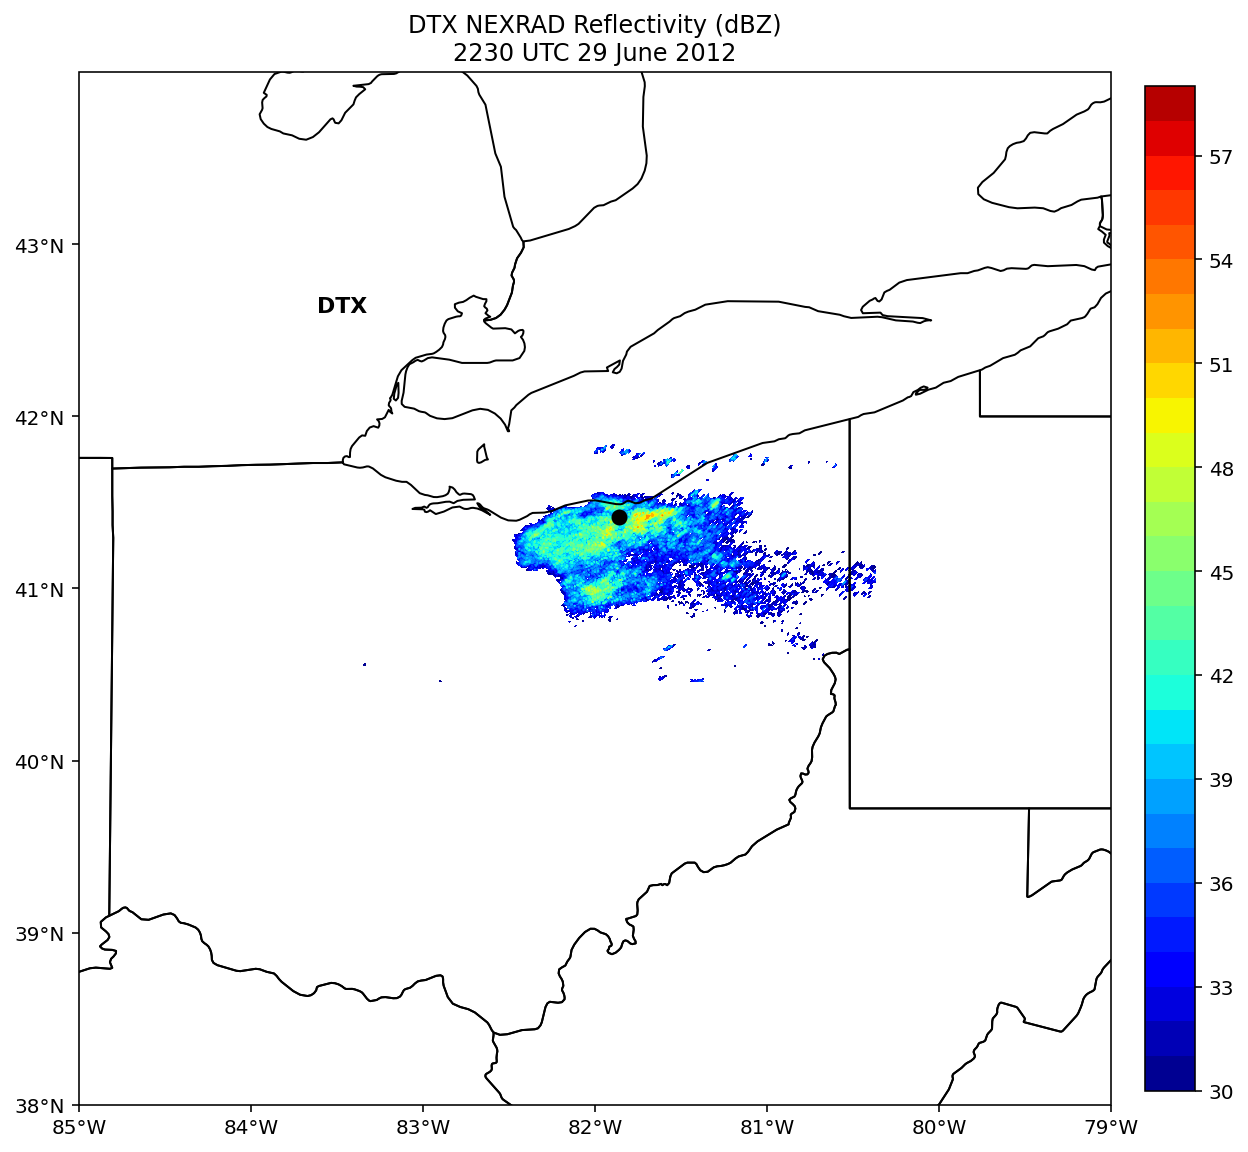

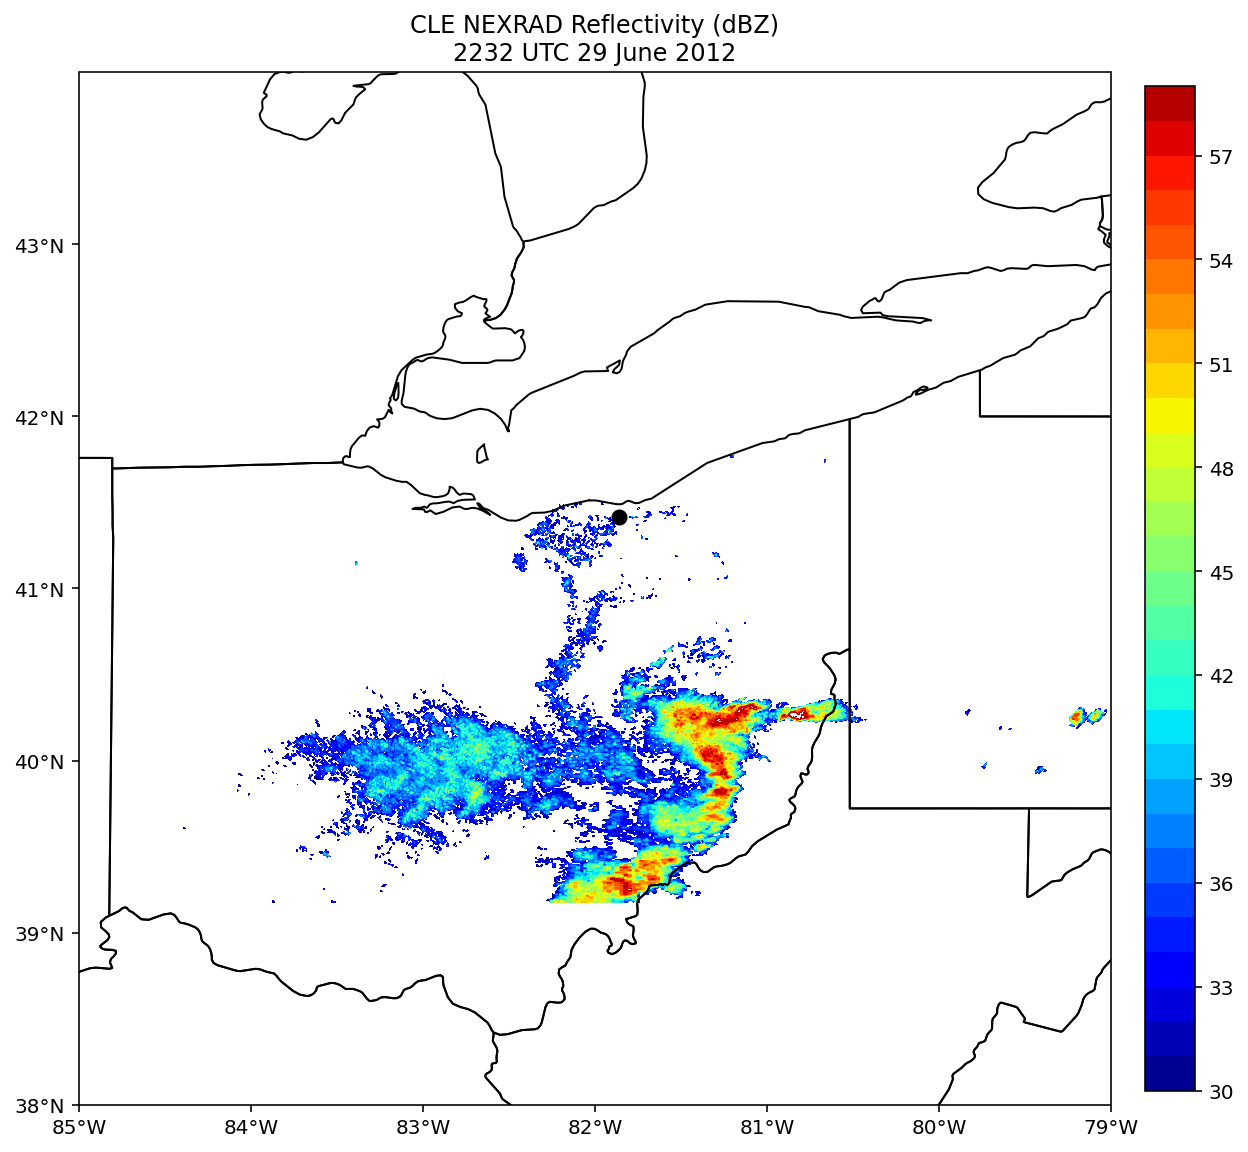

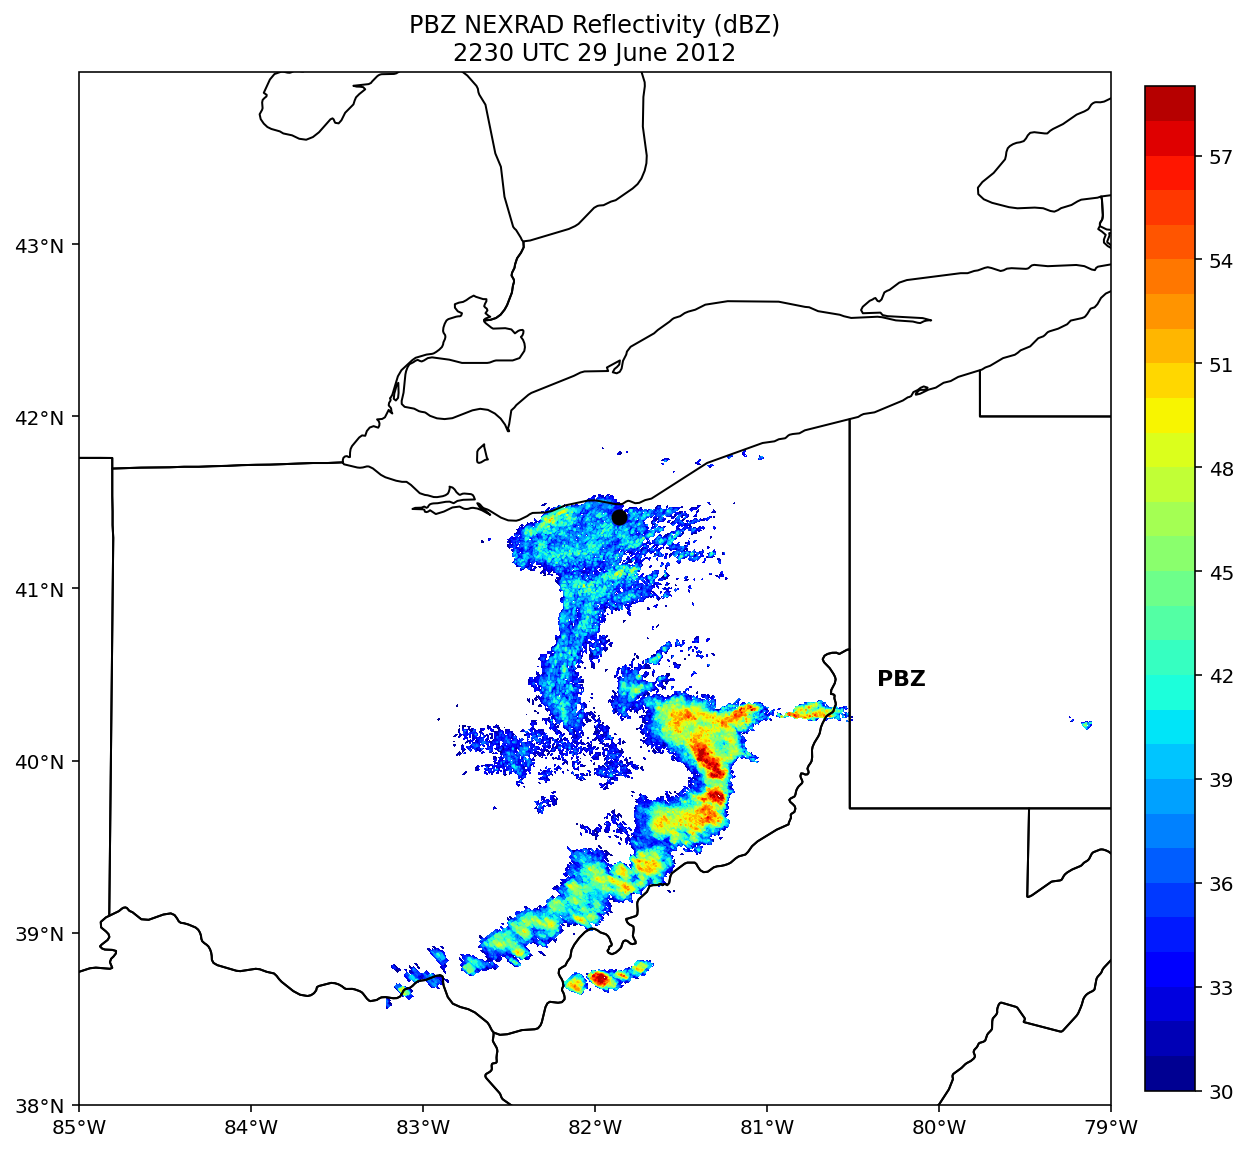

In [3]:
fig = plt.figure(figsize=(10, 12))
img_extent = (-85, -79, 38, 43)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-85, -79, 38, 44], crs.PlateCarree(globe=None))

plt.title('DTX NEXRAD Reflectivity (dBZ)\n'
          '2230 UTC 29 June 2012')

Zlevels = np.arange(30,60,1)
cZ = ax.contourf(lonz_dtx,latz_dtx,Z_30_DTX,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=30,vmax=60)

ax.set_xticks([-85,-84,-83,-82,-81,-80,-79])
ax.set_yticks([38,39,40,41,42,43])   

ax.plot(-81.8621, 41.41398, 'ok', markersize=7, transform=crs.Geodetic())
ax.text(-83.471667, 42.699722, 'DTX', color='black', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cZ,fraction=0.045,pad=0.03)
plt.savefig("Z_DTX_2230.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-85, -79, 38, 43)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-85, -79, 38, 44], crs.PlateCarree(globe=None))

plt.title('CLE NEXRAD Reflectivity (dBZ)\n'
          '2232 UTC 29 June 2012')

Zlevels = np.arange(30,60,1)
cZ = ax.contourf(lonz_cle,latz_cle,Z_30_CLE,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=30,vmax=60)

ax.set_xticks([-85,-84,-83,-82,-81,-80,-79])
ax.set_yticks([38,39,40,41,42,43])   

ax.plot(-81.8621, 41.41398, 'ok', markersize=7, transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cZ,fraction=0.045,pad=0.03)
plt.savefig("Z_CLE_2232.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-85, -79, 38, 43)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-85, -79, 38, 44], crs.PlateCarree(globe=None))

plt.title('PBZ NEXRAD Reflectivity (dBZ)\n'
          '2230 UTC 29 June 2012')

Zlevels = np.arange(30,60,1)
cZ = ax.contourf(lonz_pbz,latz_pbz,Z_30_PBZ,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=30,vmax=60)

ax.set_xticks([-85,-84,-83,-82,-81,-80,-79])
ax.set_yticks([38,39,40,41,42,43])   

ax.plot(-81.8621, 41.41398, 'ok', markersize=7, transform=crs.Geodetic())
ax.text(-80.218056, 40.531667, 'PBZ', color='black', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cZ,fraction=0.045,pad=0.03)
plt.savefig("Z_PBZ_2230.png",dpi=250,bbox_inches='tight')
plt.show()


In [16]:
#Calculate number of seconds since 1/1/1987

year = 2012
print("Current year is ", year)
sec_yr = 31536000
delta_year = year - 1987
print("Year difference = ", delta_year)
total_sec = delta_year * sec_yr
print("Total number of seconds from 1987 to", year)
print(total_sec)
leapdays = 6
leapday_sec = leapdays * 86400
print("Total number of leap day seconds")
print(leapday_sec)
total_sec = (delta_year * sec_yr) + leapday_sec
print("Total number of seconds from 1987 to", year)
print(total_sec)
dayofyear = 180
total_sec_doy = 86400 * dayofyear
print("Total number of seconds to current year day", dayofyear)
print(total_sec_doy)
currentday = dayofyear + 1
print("Current day of year is", currentday)
total_sec_currday = total_sec + total_sec_doy
print("Total number of seconds up to current day")
print(total_sec_currday)
scan_time = 804549992.72
print(scan_time)
currentday_sec = scan_time - total_sec_currday
print("Number of seconds in current day")
print(currentday_sec)
day_hour = currentday_sec/3600
print("Current hour is", day_hour)
day_hour_int = int(day_hour)
print("Current hour is", day_hour_int)
hour_frac = day_hour - day_hour_int
print(hour_frac)
minutes = hour_frac * 60
print("Scan time is")
print("Hour:", day_hour_int)
print("Minutes:", minutes)


Current year is  2012
Year difference =  25
Total number of seconds from 1987 to 2012
788400000
Total number of leap day seconds
518400
Total number of seconds from 1987 to 2012
788918400
Total number of seconds to current year day 180
15552000
Current day of year is 181
Total number of seconds up to current day
804470400
804549992.72
Number of seconds in current day
79592.72000002861
Current hour is 22.109088888896835
Current hour is 22
0.1090888888968351
Scan time is
Hour: 22
Minutes: 6.545333333810106


/tmp/ipykernel_2982/2310922161.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
/tmp/ipykernel_2982/2310922161.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_fid.variables['lat'][:]  # extract/copy the data
/tmp/ipykernel_2982/2310922161.py:5: DeprecationWarni

dict_keys(['Reflectivity', 'lat', 'lon', 'time'])
Z_PBZ shape (587, 799) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Z_PBZ min, Z_PBZ max -26.0 64.0
lat shape, lon shape (587,) (799,)
Z shape (587, 799) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Z_30 shape (587, 799)
Z_40 shape (587, 799)
lats shape, lons shape (587, 799) (587, 799) [[38.29736498 38.29736498 38.29736498 ... 38.29736498 38.29736498
  38.29736498]
 [38.30487064 38.30487064 38.30487064 ... 38.30487064 38.30487064
  38.30487064]
 [38.31237629 38.31237629 38.31237629 ... 38.31237629 38.31237629
  38.31237629]
 ...
 [42.68066951 42.68066951 42.68066951 ... 42.68066951 42.68066951
  42.68066951]
 [42.68817517 42.68817517 42.68817517 ... 42.68817517 42.68817517
  42.68817517]
 [42.69568083 42.69568083 42.6

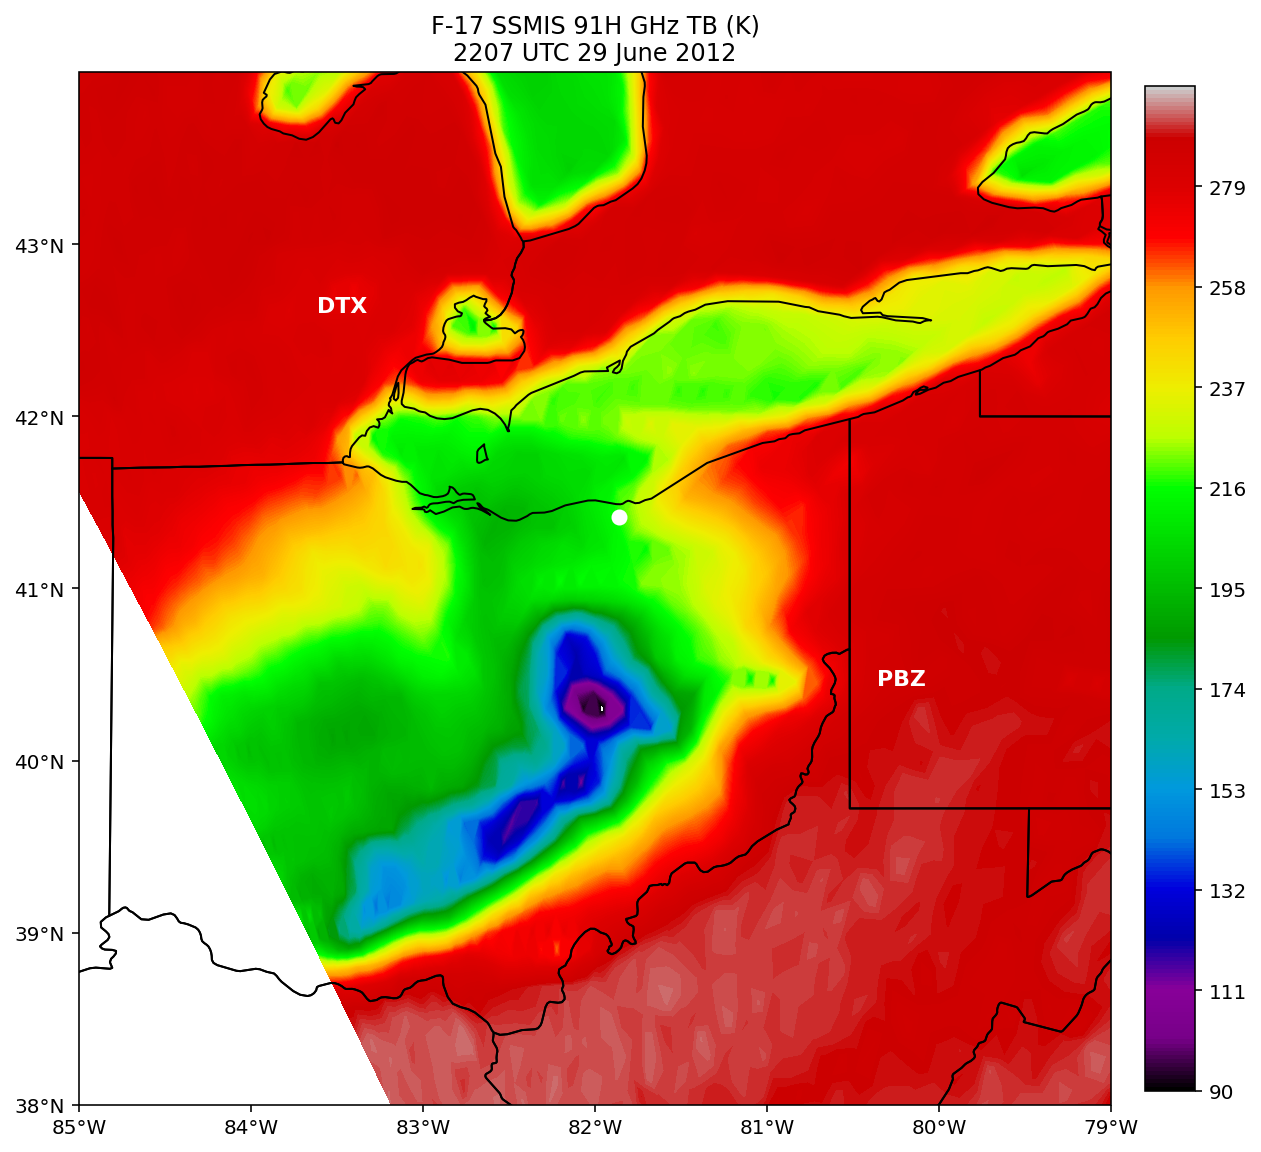

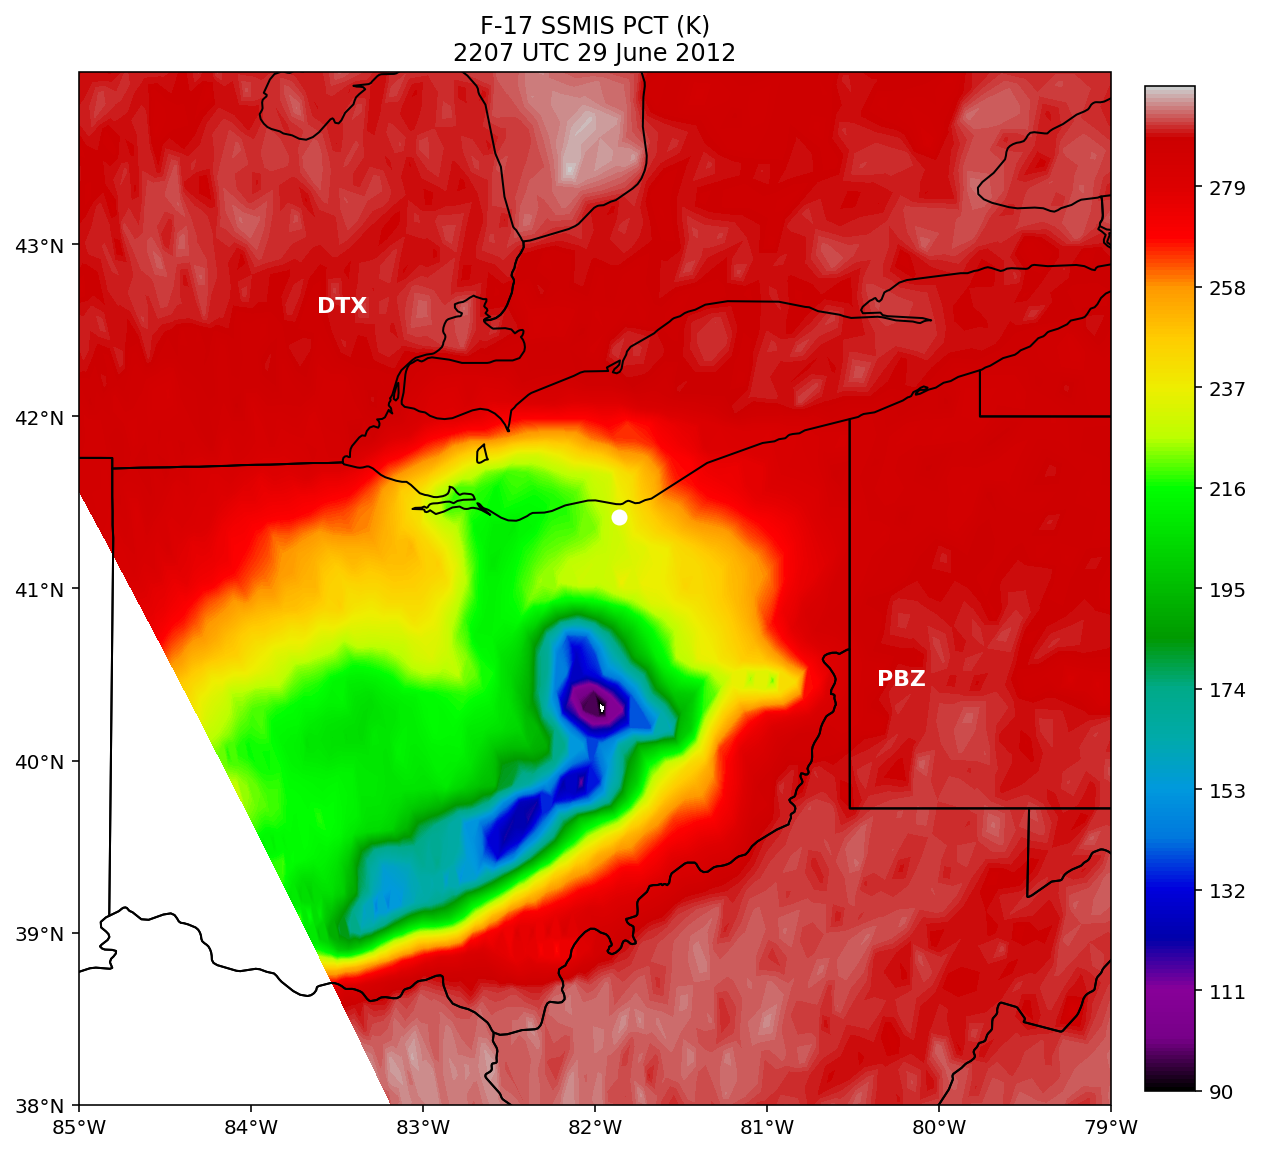

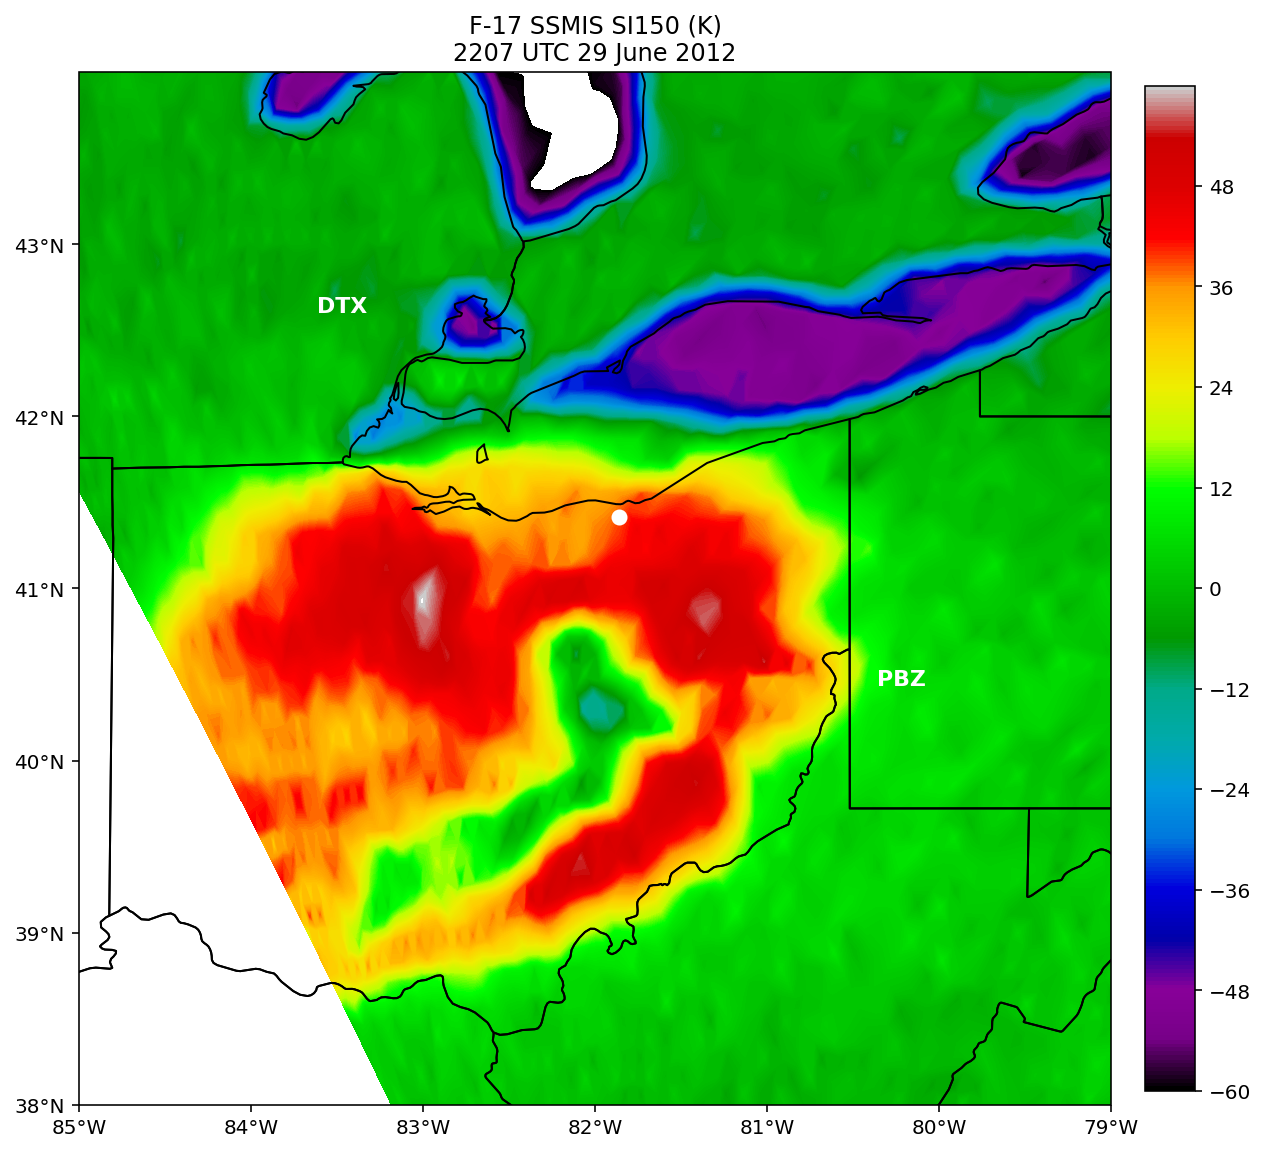

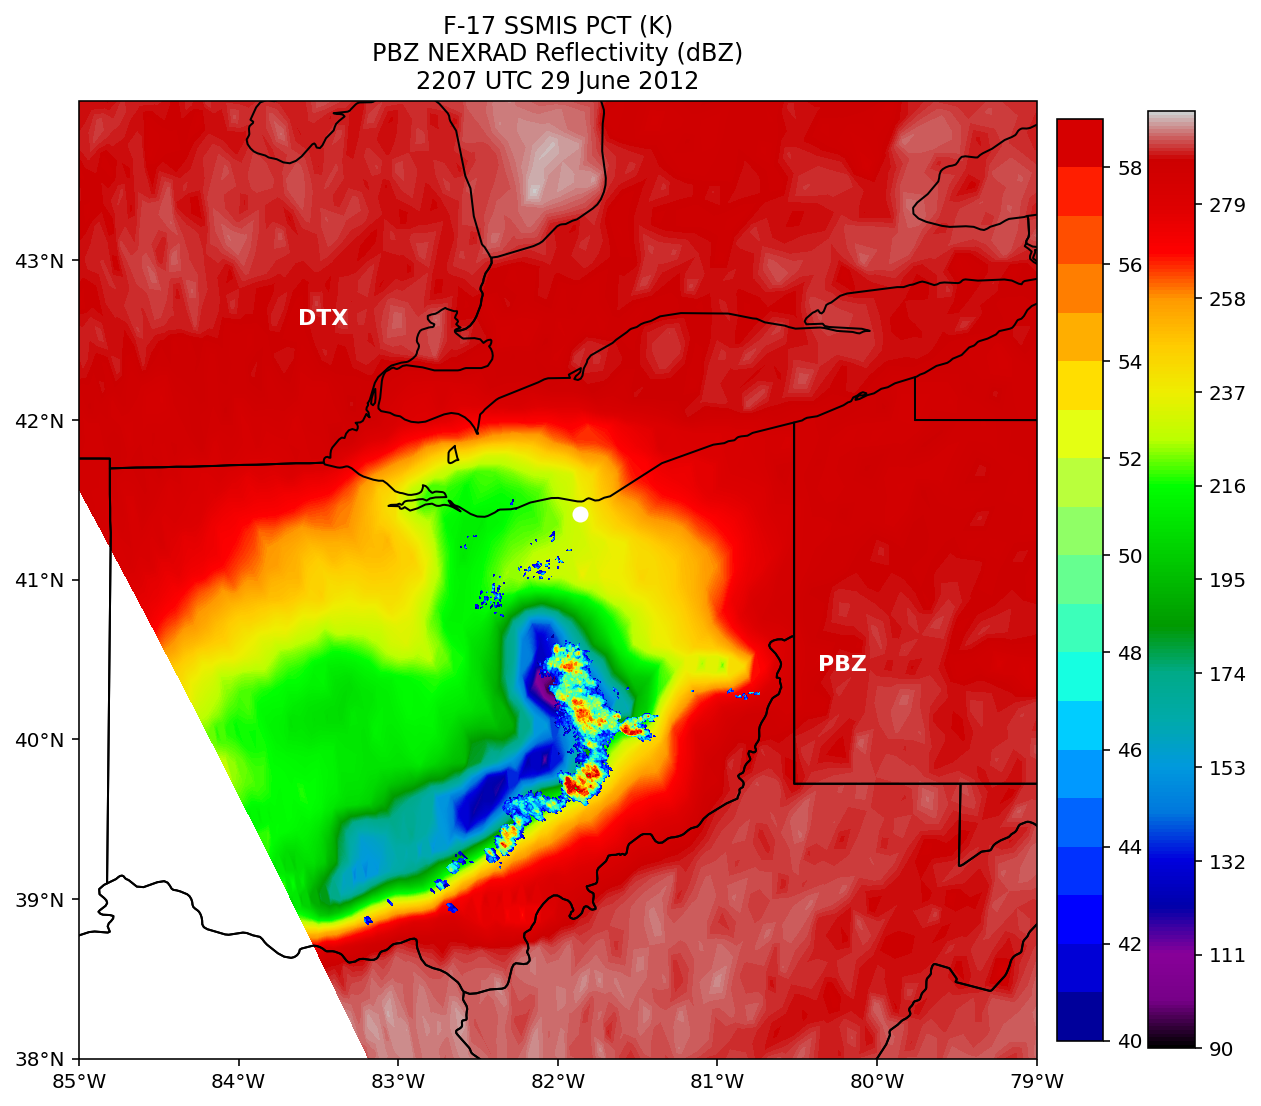

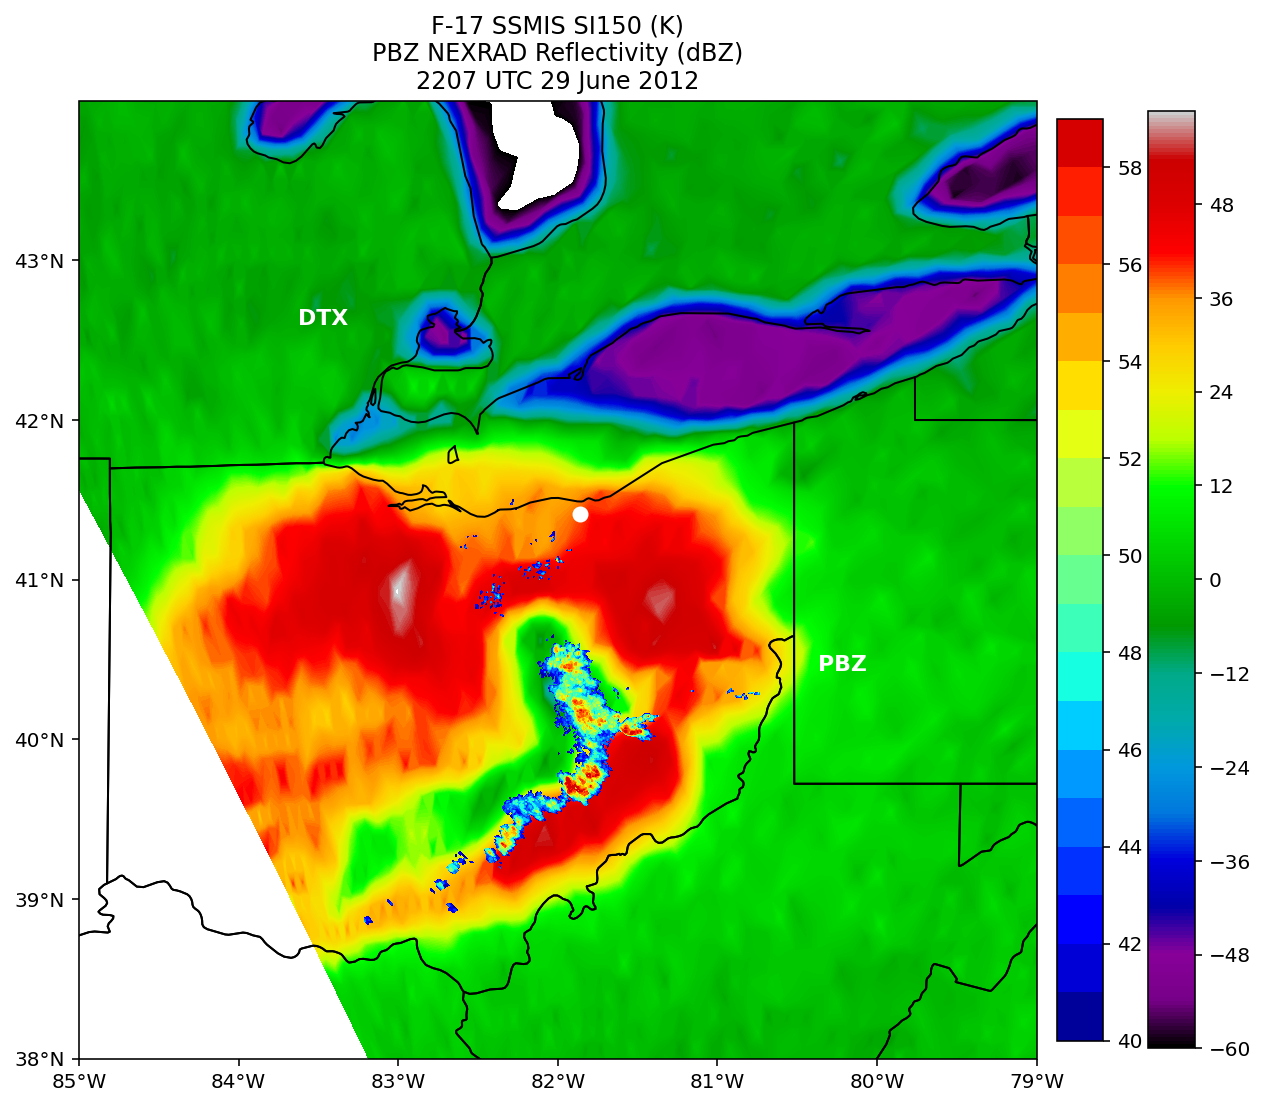

In [5]:
def read_radar_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z, lat, lon, names

Z_file_PBZ = 'KPBZ_V06_20120629_220616.nc'
Z_PBZ, lat_pbz, lon_pbz, names = read_radar_plot(Z_file_PBZ)
Z_PBZ = Z_PBZ[0,:,:]
Z_PBZ = np.nan_to_num(Z_PBZ)
print(names)
print('Z_PBZ shape', Z_PBZ.shape, Z_PBZ)
Z_PBZ_max = np.amax(Z_PBZ)
Z_PBZ_min = np.amin(Z_PBZ)
print('Z_PBZ min, Z_PBZ max', Z_PBZ_min, Z_PBZ_max)
print('lat shape, lon shape', lat_pbz.shape, lon_pbz.shape)

Z_30_PBZ, Z_40_PBZ, lonz_pbz, latz_pbz = make_radar_mask(Z_PBZ, lat_pbz, lon_pbz)

SI150 = TB1 - TB3
SI150_max = np.amax(SI150)
SI150_min = np.amin(SI150)
print("SI150 max =", SI150_max)
print("SI150 min =", SI150_min)
print("SI150 = ", SI150, SI150.shape)

PCT = (1.818*TB2)-(0.818*TB1)
PCTmn = np.mean(PCT)
print("PCT mean = ", PCTmn)
PCT_max = np.amax(PCT)
PCT_min = np.amin(PCT)
print("PCT max =", PCT_max)
print("PCT min =", PCT_min)
print("PCT = ", PCT, PCT.shape)

fig = plt.figure(figsize=(10, 12))
img_extent = (-85, -79, 38, 43)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-85, -79, 38, 44], crs.PlateCarree(globe=None))

plt.title('F-17 SSMIS 91H GHz TB (K)\n'
          '2207 UTC 29 June 2012')

Tlevels = np.arange(90,300,0.1)
cbtd = ax.contourf(lons,lats,TB1,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-85,-84,-83,-82,-81,-80,-79])
ax.set_yticks([38,39,40,41,42,43])   

ax.plot(-81.8621, 41.41398, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-83.471667, 42.699722, 'DTX', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-80.218056, 40.531667, 'PBZ', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.045,pad=0.03)
plt.savefig("ssmis_91H_2207.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-85, -79, 38, 43)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-85, -79, 38, 44], crs.PlateCarree(globe=None))

plt.title('F-17 SSMIS PCT (K)\n'
          '2207 UTC 29 June 2012')

Tlevels = np.arange(90,300,0.1)
cbtd = ax.contourf(lons,lats,PCT,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-85,-84,-83,-82,-81,-80,-79])
ax.set_yticks([38,39,40,41,42,43])   

ax.plot(-81.8621, 41.41398, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-83.471667, 42.699722, 'DTX', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-80.218056, 40.531667, 'PBZ', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.045,pad=0.03)
plt.savefig("ssmis_PCT_2207.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-85, -79, 38, 43)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-85, -79, 38, 44], crs.PlateCarree(globe=None))

plt.title('F-17 SSMIS SI150 (K)\n'
          '2207 UTC 29 June 2012')

Tlevels = np.arange(-60,60,0.1)
cbtd = ax.contourf(lons,lats,SI150,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-85,-84,-83,-82,-81,-80,-79])
ax.set_yticks([38,39,40,41,42,43])   

ax.plot(-81.8621, 41.41398, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-83.471667, 42.699722, 'DTX', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-80.218056, 40.531667, 'PBZ', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.045,pad=0.03)
plt.savefig("ssmis_SI150_2207.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-85, -79, 38, 43)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-85, -79, 38, 44], crs.PlateCarree(globe=None))

plt.title('F-17 SSMIS PCT (K)\n'
          'PBZ NEXRAD Reflectivity (dBZ)\n'
          '2207 UTC 29 June 2012')

Tlevels = np.arange(90,300,0.1)
cbtd = ax.contourf(lons,lats,PCT,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')
Zlevels = np.arange(40,60,1)
cZ = ax.contourf(lonz_pbz,latz_pbz,Z_40_PBZ,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=40,vmax=60)

ax.set_xticks([-85,-84,-83,-82,-81,-80,-79])
ax.set_yticks([38,39,40,41,42,43])   

ax.plot(-81.8621, 41.41398, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-83.471667, 42.699722, 'DTX', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-80.218056, 40.531667, 'PBZ', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(cbtd,fraction=0.042,pad=0.04)
cbar2=plt.colorbar(cZ,fraction=0.045,pad=0.02)
plt.savefig("ssmis_PCT_Z_2207.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-85, -79, 38, 43)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-85, -79, 38, 44], crs.PlateCarree(globe=None))

plt.title('F-17 SSMIS SI150 (K)\n'
          'PBZ NEXRAD Reflectivity (dBZ)\n'
          '2207 UTC 29 June 2012')

Tlevels = np.arange(-60,60,0.1)
cbtd = ax.contourf(lons,lats,SI150,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')
Zlevels = np.arange(40,60,1)
cZ = ax.contourf(lonz_pbz,latz_pbz,Z_40_PBZ,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=40,vmax=60)

ax.set_xticks([-85,-84,-83,-82,-81,-80,-79])
ax.set_yticks([38,39,40,41,42,43])   

ax.plot(-81.8621, 41.41398, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-83.471667, 42.699722, 'DTX', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-80.218056, 40.531667, 'PBZ', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(cbtd,fraction=0.042,pad=0.04)
cbar2=plt.colorbar(cZ,fraction=0.045,pad=0.02)
plt.savefig("ssmis_SI150_Z_2207.png",dpi=250,bbox_inches='tight')
plt.show()
